In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
from datetime import time
%matplotlib inline
sns.set(style="darkgrid")

In [80]:
data = pd.read_csv('../data/household_power_consumption.csv')

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [81]:
data.head(5)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [82]:
data['Date'] = pd.to_datetime(data.Date,format='%d/%m/%Y')
data['Time'] = pd.to_datetime(data.Time,format='%H:%M:%S').dt.time

In [83]:
data.shape

(2075259, 9)

In [84]:
data.describe()

,Sub_metering_3
count,2.049280e+06
mean,6.458447e+00
std,8.437154e+00
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,1.700000e+01
max,3.100000e+01


In [85]:
data.replace('?',np.nan,inplace=True)

Columns with NaN values

In [86]:
nans = data.isna().any()
nans.sum() # numb of columns with nan values

7

In [87]:
nan_columns = nans[nans==True].keys().tolist()
nan_columns

['Global_active_power',
 'Global_reactive_power',
 'Voltage',
 'Global_intensity',
 'Sub_metering_1',
 'Sub_metering_2',
 'Sub_metering_3']

In [88]:
data.isna().sum()

Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [89]:
data.isna().any(axis=1).sum() # Rows with nan values

25979

In [90]:
data[nan_columns] = data[nan_columns].astype(float).interpolate(method='index')

In [91]:
data.isna().any()

Date                     False
Time                     False
Global_active_power      False
Global_reactive_power    False
Voltage                  False
Global_intensity         False
Sub_metering_1           False
Sub_metering_2           False
Sub_metering_3           False
dtype: bool

In [92]:
numerical_cols = list(set(data.columns)-set(['Date','Time']))
data[numerical_cols] = data[numerical_cols].astype(float)

In [93]:
data.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06
mean,1.090280e+00,1.236492e-01,2.408328e+02,4.621481e+00,1.109485e+00,1.289229e+00,6.442386e+00
std,1.052628e+00,1.124194e-01,3.237763e+00,4.424361e+00,6.115843e+00,5.786613e+00,8.415860e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.100000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.140000e-01,1.000000e-01,2.410000e+02,2.751585e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428700e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [16]:
def plot_feature_distribution(df, features):
    fig, ax = plt.subplots(4,2,figsize=(18,26))

    for i,feature in enumerate(features):
        plt.subplot(4,2,i+1)
        
        sns.distplot(df[feature],kde=False)
        
        plt.xlabel(feature, fontsize=12)

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


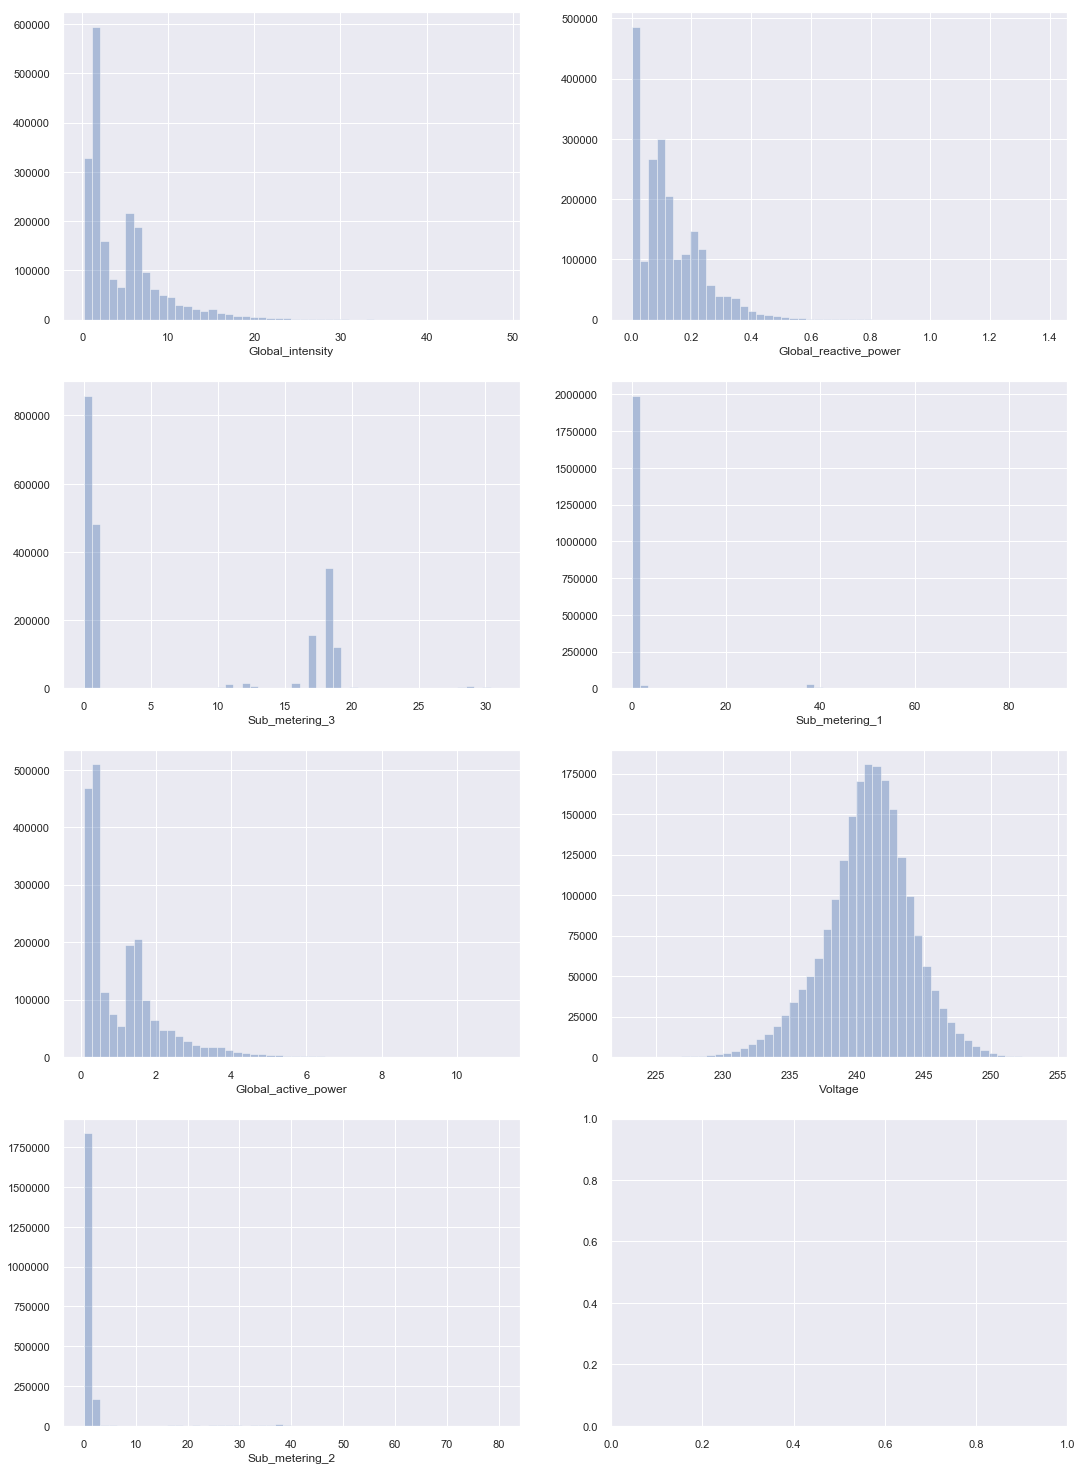

In [17]:
plot_feature_distribution(data,numerical_cols)

In [94]:
data['active_energy_consumption'] = data['Global_active_power'] * 1000 / 60 - data['Sub_metering_1'] - data['Sub_metering_2'] - data['Sub_metering_3']
two_days = data.loc[(data.Date == '2008-02-01')|(data.Date == '2008-02-02')]

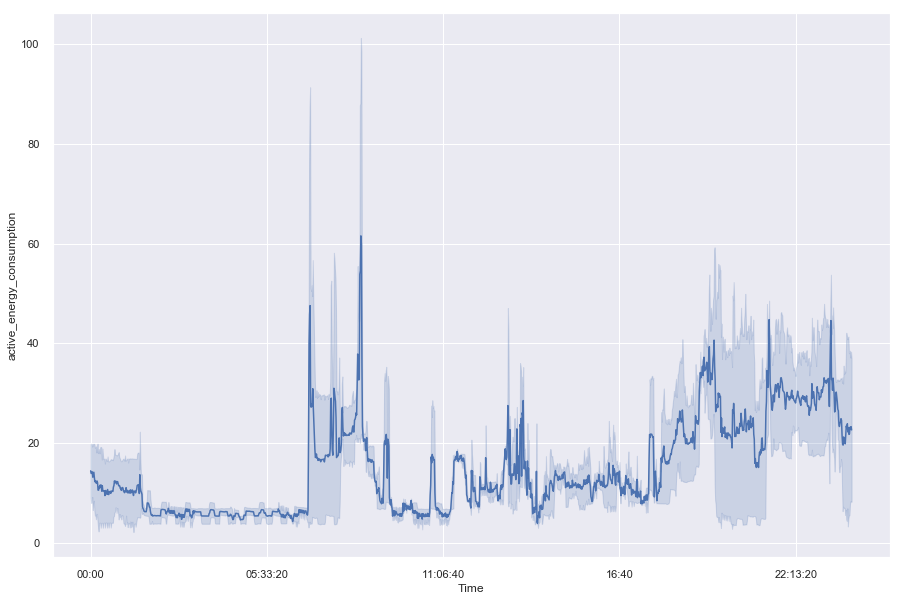

In [19]:
fig, ax = plt.subplots(figsize=(15,10))
sns.lineplot(x='Time',y='active_energy_consumption', data=two_days)

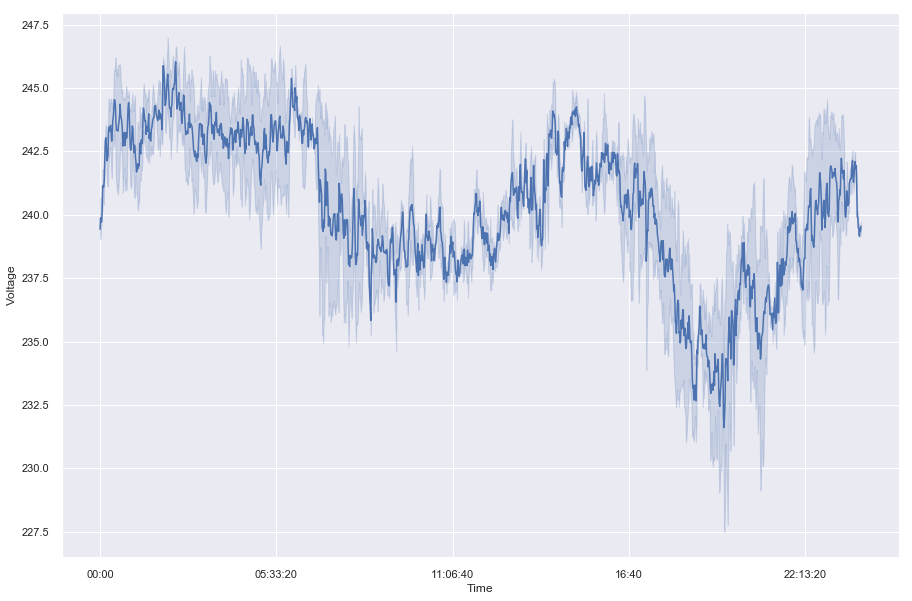

In [20]:
fig, ax = plt.subplots(figsize=(15,10))
sns.lineplot(x='Time',y='Voltage', data=two_days)

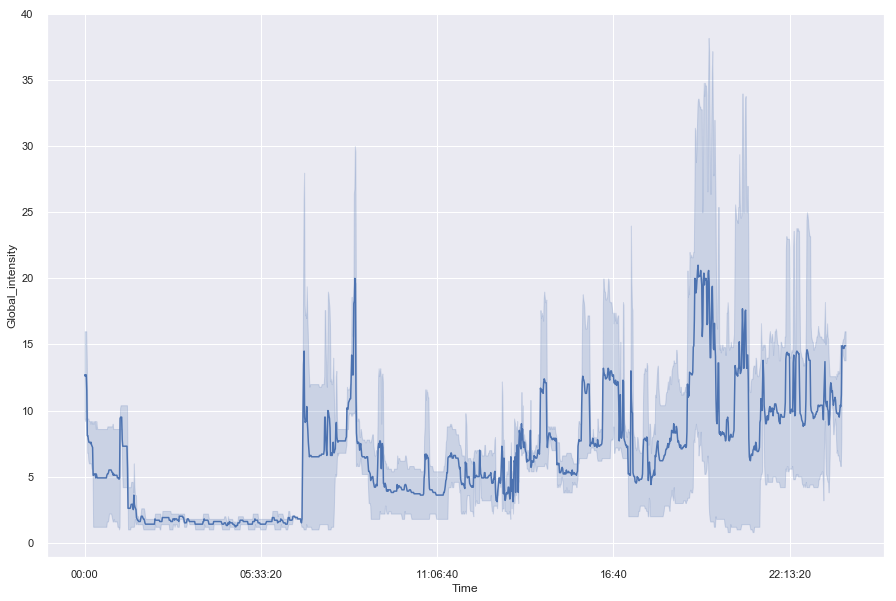

In [21]:
fig, ax = plt.subplots(figsize=(15,10))
sns.lineplot(x='Time',y='Global_intensity', data=two_days)

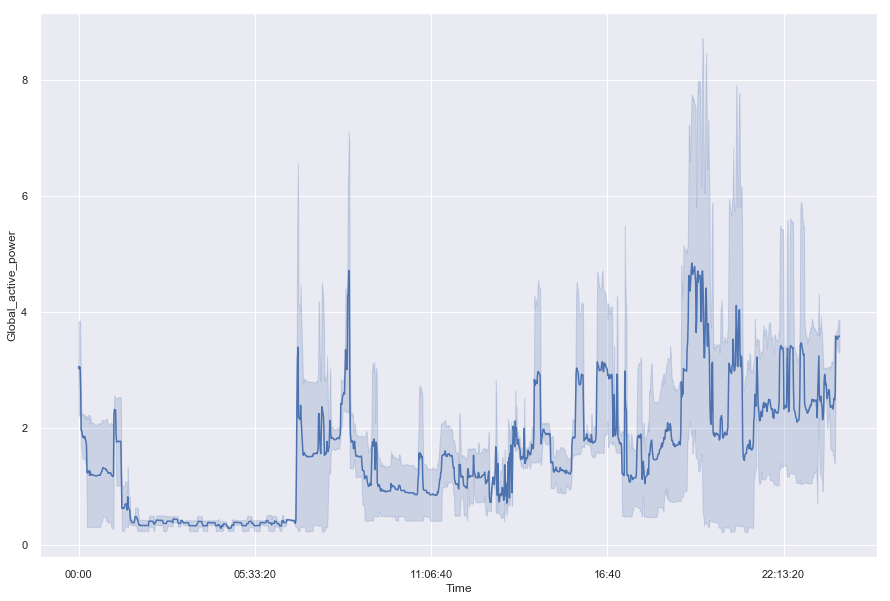

In [22]:
fig, ax = plt.subplots(figsize=(15,10))
sns.lineplot(x='Time',y='Global_active_power', data=two_days)

In [23]:
multiple = two_days[['Sub_metering_1','Sub_metering_2','Sub_metering_3','Time']].melt(id_vars='Time')

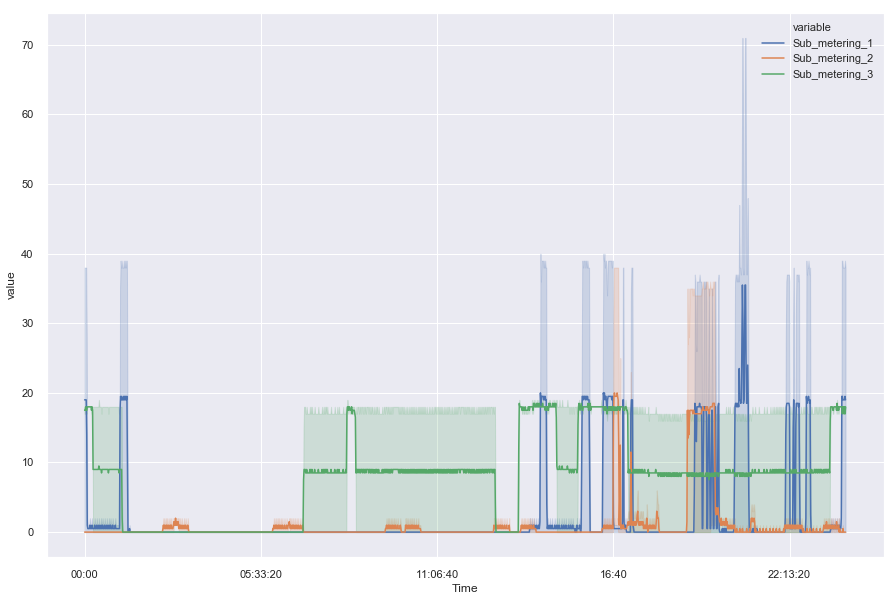

In [24]:
fig, ax = plt.subplots(figsize=(15,10))
sns.lineplot(x='Time',y='value',hue='variable', data=multiple)

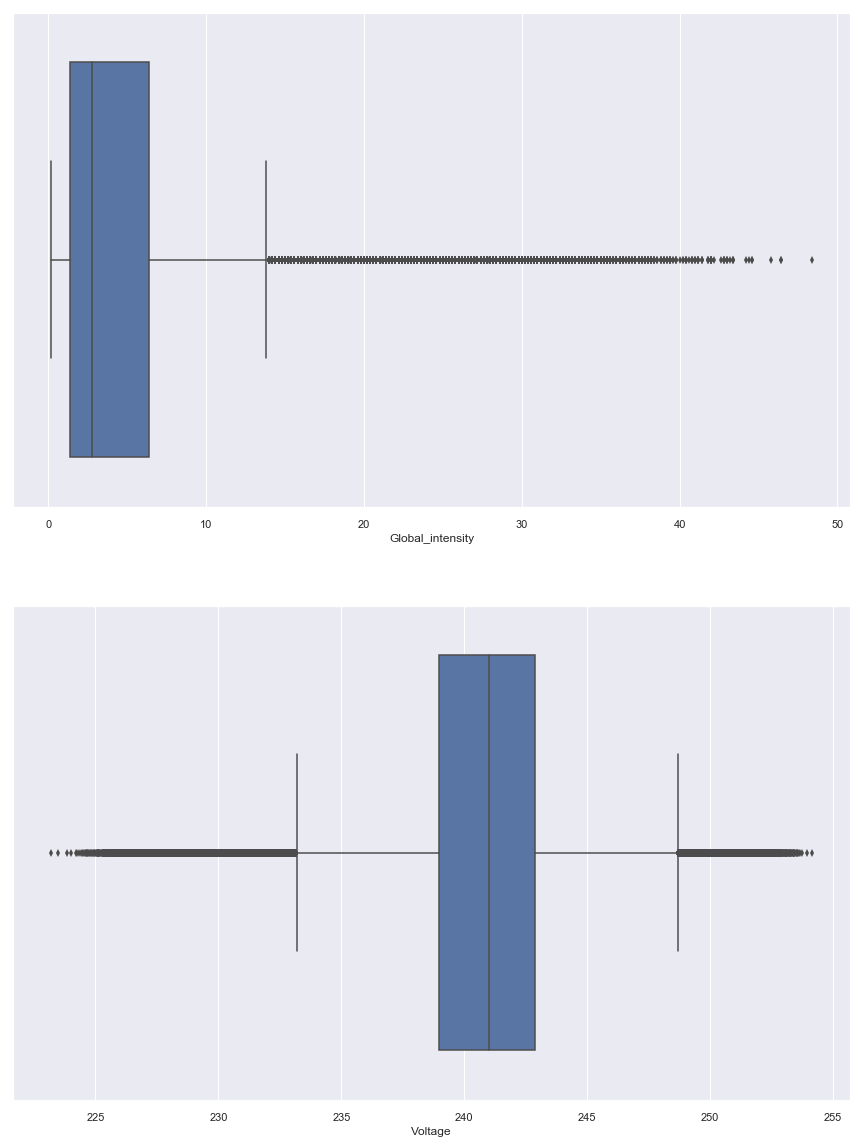

In [25]:
fig, ax = plt.subplots(2,1,figsize=(15,20))
for i,feature in enumerate(['Global_intensity','Voltage']):
    plt.subplot(2,1,i+1)

    sns.boxplot(data[feature])

    plt.xlabel(feature, fontsize=12)

Find outliers using IQR

In [26]:
Q1 = data['Voltage'].quantile(0.25)
Q3 = data['Voltage'].quantile(0.75)
IQR = Q3 - Q1
outliers = data[(data['Voltage'] < (Q1 - 1.5 * IQR)) | (data['Voltage'] > (Q3 + 1.5 * IQR))]

In [27]:
outliers.Date.dt.date.unique()

array([datetime.date(2006, 12, 16), datetime.date(2006, 12, 17),
       datetime.date(2006, 12, 18), datetime.date(2006, 12, 19),
       datetime.date(2006, 12, 20), datetime.date(2006, 12, 21),
       datetime.date(2006, 12, 22), datetime.date(2006, 12, 23),
       datetime.date(2006, 12, 24), datetime.date(2006, 12, 25),
       datetime.date(2006, 12, 26), datetime.date(2006, 12, 27),
       datetime.date(2006, 12, 28), datetime.date(2006, 12, 29),
       datetime.date(2006, 12, 30), datetime.date(2006, 12, 31),
       datetime.date(2007, 1, 2), datetime.date(2007, 1, 4),
       datetime.date(2007, 1, 5), datetime.date(2007, 1, 6),
       datetime.date(2007, 1, 7), datetime.date(2007, 1, 8),
       datetime.date(2007, 1, 9), datetime.date(2007, 1, 10),
       datetime.date(2007, 1, 11), datetime.date(2007, 1, 13),
       datetime.date(2007, 1, 14), datetime.date(2007, 1, 15),
       datetime.date(2007, 1, 17), datetime.date(2007, 1, 18),
       datetime.date(2007, 1, 19), datetime.da

In [95]:
for i in range(1,4):
    data['Global_active_power_past_{}'.format(i)] = data['Global_active_power'].shift(periods=i,fill_value=4)

In [96]:
data['weekday'] = data.Date.dt.weekday
data['PM'] = data['Time'] > time.fromisoformat('12:00:00')
data['after_work'] = ((data['Time'] > time.fromisoformat('18:00:00')))

In [97]:
def season(x,spring=range(80, 172),summer=range(172, 264),fall=range(264, 355)):
    day = x.timetuple().tm_yday
    if day in spring:
        return 1
    elif day in summer:
        return 2
    elif day in fall:
        return 3
    return 0
data['season']=data['Date'].apply(lambda x: season(x))

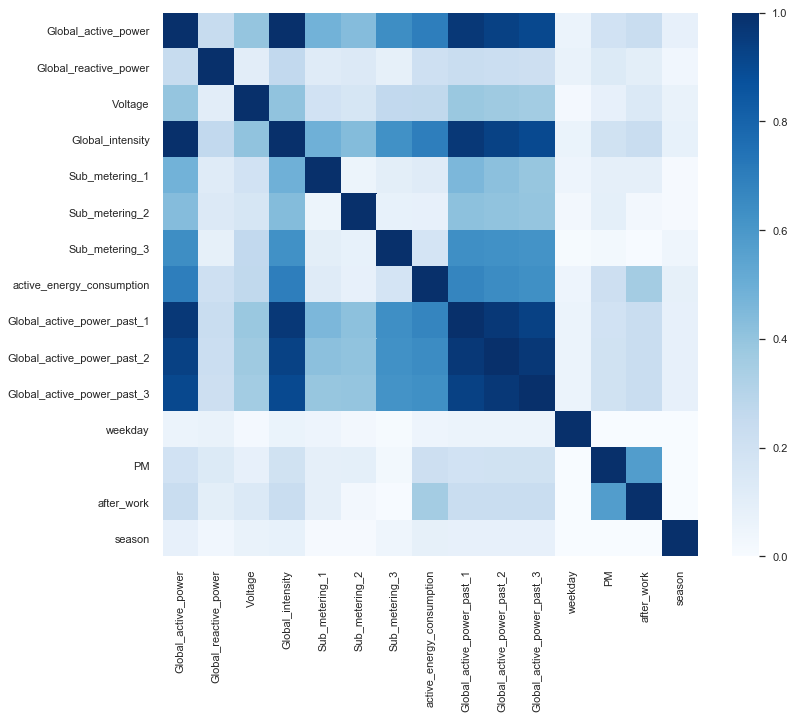

In [98]:
fig,ax=plt.subplots(figsize=(12,10))
sns.heatmap(abs(data.corr()),cmap="Blues")

Gloval active power and intensity are completely correlated, probably meaning that one directly affects the other and vice versa. Anything except the Sub_metering_1/2/3 are highly correlated with almost all other columns.

In [99]:
pandas_profiling.ProfileReport(data)

In [50]:
data.drop(['Date','Time'],axis=1,inplace=True)

In [51]:
target = 'Global_active_power' 

In [55]:
from sklearn.model_selection import TimeSeriesSplit

time_split = TimeSeriesSplit(n_splits=5)
for fold,(train_idx,val_idx) in enumerate(time_split.split(data)):
    X_train,X_test = data.iloc[train_idx],data.iloc[val_idx]
    y_train,y_test = data[target][train_idx],data[target][val_idx]
    # LEARN

/usr/local/lib/python3.7/site-packages/pandas/core/series.py:942: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]
